___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Car Price Prediction Project***". This is the first medium project of ***Machine Learning*** course. In this project you will have the opportunity to apply many algorithms commonly used for regression problems.

Also, you will apply various processes such as pre-processing, ***train-test spilit*** and ***cross validation*** that you will use in algorithm modeling and prediction processes in Python with ***scikit-learn***. 

Before diving into the project, please take a look at the determines and tasks.

- **NOTE:** This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind regression algorithms and scikit-learn module as well as Machine Learning before you begin.


# #Determines

**Auto Scout** data which using for this project, scraped from the on-line car trading company(https://www.autoscout24.com)in 2019, contains many features of 9 different car models. In this project, you will use the data set which is already preprocessed and prepared for algorithms .

The aim of this project to understand of machine learning algorithms. Therefore, you will not need any EDA process as you will be working on the edited data.

---

In this Senario, you will estimate the prices of cars using regression algorithms.

While starting you should import the necessary modules and load the data given as pkl file. Also you'll need to do a few pre-processing before moving to modelling. After that you will implement ***Linear Regression, Ridge Regression, Lasso Regression,and Elastic-Net algorithms respectively*** (After completion of Unsupervised Learning section, you can also add bagging and boosting algorithms such as ***Random Forest and XG Boost*** this notebook to develop the project). You can measure the success of your models with regression evaluation metrics as well as with cross validation method.

For the better results, you should try to increase the success of your models by performing hyperparameter tuning. Determine feature importances for the model. You can set your model with the most important features for resource saving. You should try to apply this especially in Random Forest and XG Boost algorithms. Unlike the others, you will perform hyperparameter tuning for Random Forest and XG Boost using the ***GridSearchCV*** method. 

Finally You can compare the performances of algorithms, work more on the algorithm have the most successful prediction rate.






# #Tasks

#### 1. Import Modules, Load Data and Data Review
#### 2. Data Pre-Processing
#### 3. Implement Linear Regression 
#### 4. Implement Ridge Regression
#### 5. Implement Lasso Regression 
#### 6. Implement Elastic-Net
#### 7. Visually Compare Models Performance In a Graph

## 1. Import Modules, Load Data and Data Review

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from skimpy import clean_columns
import matplotlib.pyplot as plt
import scipy.stats as stats
#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 150

In [2]:
df=pd.read_csv('final_scout_with_no_dummy.csv')
df.head()

,make_model,body_type,price,km,previous_owners,inspection_new,gearing_type,displacement,weight,fuel,co2_emission,comfort_convenience,entertainment_media,extras,safety_security,gears,age,hp_kW,comb_cons
0,Audi A1,Sedans,15770,56013.000,2.000,1,Automatic,1422.000,1220.000,Diesel,99.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",7.000,3.000,66.000,3.800
1,Audi A1,Sedans,14500,80000.000,1.000,0,Automatic,1798.000,1255.000,Benzin,129.000,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",7.000,2.000,141.000,5.600
2,Audi A1,Sedans,14640,83450.000,1.000,0,Automatic,1598.000,1135.000,Diesel,99.000,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",7.000,3.000,85.000,3.800
3,Audi A1,Sedans,14500,73000.000,1.000,0,Automatic,1422.000,1195.000,Diesel,99.000,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",6.000,3.000,66.000,3.800
4,Audi A1,Sedans,16790,16200.000,1.000,1,Automatic,1422.000,1135.000,Diesel,109.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",7.000,3.000,66.000,4.100


In [3]:
df.shape

(15918, 19)

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,15918.000,18019.257,7385.961,13.000,12850.000,16900.000,21900.000,74600.000
km,15918.000,32082.663,36976.914,0.000,1903.250,20403.500,46899.250,317000.000
previous_owners,15918.000,1.043,0.338,0.000,1.000,1.000,1.000,4.000
inspection_new,15918.000,0.247,0.431,0.000,0.000,0.000,0.000,1.000
displacement,15918.000,1428.606,275.820,890.000,1229.000,1461.000,1598.000,2967.000
weight,15918.000,1337.445,200.466,1.000,1165.000,1295.000,1472.000,2471.000
co2_emission,15918.000,118.156,17.552,36.000,104.000,118.000,129.000,199.000
gears,15918.000,5.937,0.705,5.000,5.000,6.000,6.000,8.000
age,15918.000,1.389,1.121,0.000,0.000,1.000,2.000,3.000
hp_kW,15918.000,88.494,26.661,40.000,66.000,85.000,101.000,294.000


In [5]:
df = df.join(df["comfort_convenience"].str.get_dummies(sep = ",").add_prefix("cc_"))
df = df.join(df["entertainment_media"].str.get_dummies(sep = ",").add_prefix("em_"))
df = df.join(df["extras"].str.get_dummies(sep = ",").add_prefix("ex_"))
df = df.join(df["safety_security"].str.get_dummies(sep = ",").add_prefix("ss_"))

In [6]:
df.drop(["comfort_convenience","entertainment_media","extras","safety_security"], axis=1, inplace=True)

In [7]:
df = pd.get_dummies(df)

In [9]:
df.shape

(15918, 128)

The dataframe contains 15918 observations and 128 features including dummies.

## 2. Data Pre-Processing

As you know, the data set must be edited before proceeding to the implementation of the model. As the last step before model fitting, you need to spilit the data set as train and test. Then, you should train the model with train data and evaluate the performance of the model on the test data. You can use the train and test data you have created for all algorithms.

You must also drop your target variable, the column you are trying to predict.

You can use many [performance metrics for regression](https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-problems-343c4923d922) to measure the performance of the regression model you train. You can define a function to view different metric results together.

You can also use the [cross validation](https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85) method to measure the estimator performance. Cross validation uses different data samples from your test set and calculates the accuracy score for each data sample. You can calculate the final performance of your estimator by averaging these scores.

In [9]:
#target variable if compressive strength
X=df.drop(['price'],axis=1)
Y=df['price']

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [12]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
scaler =MinMaxScaler()

In [13]:
scaler.fit(X_train)

MinMaxScaler()

In [14]:
X_train_scaled = scaler.transform(X_train)
X_train_scaled

array([[1.95583596e-01, 2.50000000e-01, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.19672747e-03, 2.50000000e-01, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.15457413e-05, 5.00000000e-01, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [4.54416404e-02, 2.50000000e-01, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.88643533e-04, 2.50000000e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.92271293e-02, 2.50000000e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [15]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[0.35743849, 0.25      , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.06446372, 0.25      , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.04232492, 0.25      , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.19314511, 0.25      , 1.        , ..., 1.        , 0.        ,
        0.        ],
       [0.05088328, 0.25      , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.17633754, 0.25      , 0.        , ..., 1.        , 0.        ,
        0.        ]])

In [16]:
pd.DataFrame(X_train_scaled).agg(["mean", "std"]).round(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126
mean,0.102,0.260,0.248,0.339,0.541,0.504,0.312,0.465,0.191,0.321,0.948,0.004,0.480,0.581,0.018,0.732,0.000,0.071,0.788,0.131,0.060,0.038,0.203,0.464,0.177,0.003,0.616,0.509,0.222,0.023,0.739,0.540,0.040,0.670,0.234,0.049,0.385,0.635,0.928,0.574,0.468,0.054,0.151,0.599,0.024,0.090,0.003,0.001,0.794,0.318,0.140,0.649,0.397,0.834,0.829,0.142,0.002,0.565,0.880,0.019,0.139,0.004,0.000,0.192,0.033,0.015,0.000,0.075,0.198,0.103,0.253,0.042,0.001,0.273,0.015,0.944,0.084,0.138,0.122,0.088,0.854,0.152,0.711,0.031,0.931,0.885,0.212,0.099,0.552,0.139,0.707,0.797,0.372,0.210,0.202,0.005,0.901,0.909,0.054,0.882,0.731,0.746,0.131,0.234,0.165,0.194,0.158,0.137,0.164,0.117,0.002,0.063,0.202,0.001,0.002,0.003,0.504,0.231,0.006,0.052,0.458,0.512,0.030,0.536,0.460,0.000,0.004
std,0.117,0.085,0.432,0.174,0.081,0.108,0.235,0.373,0.105,0.152,0.223,0.064,0.500,0.493,0.131,0.443,0.009,0.257,0.409,0.337,0.237,0.192,0.402,0.499,0.382,0.053,0.486,0.500,0.416,0.151,0.439,0.498,0.195,0.470,0.423,0.216,0.487,0.482,0.259,0.494,0.499,0.225,0.358,0.490,0.153,0.287,0.052,0.031,0.404,0.466,0.347,0.477,0.489,0.373,0.377,0.350,0.048,0.496,0.325,0.138,0.346,0.060,0.013,0.394,0.179,0.123,0.015,0.264,0.399,0.305,0.435,0.200,0.028,0.445,0.123,0.230,0.277,0.345,0.327,0.283,0.353,0.359,0.453,0.174,0.253,0.319,0.408,0.298,0.497,0.346,0.455,0.402,0.483,0.407,0.402,0.069,0.299,0.288,0.227,0.323,0.443,0.435,0.338,0.423,0.371,0.395,0.364,0.344,0.371,0.322,0.044,0.242,0.402,0.023,0.041,0.058,0.500,0.421,0.077,0.221,0.498,0.500,0.170,0.499,0.498,0.013,0.067


In [17]:
pd.DataFrame(X_test_scaled).agg(["mean", "std"]).round(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126
mean,0.099,0.262,0.243,0.339,0.542,0.505,0.315,0.456,0.190,0.322,0.952,0.004,0.466,0.564,0.014,0.724,0.000,0.066,0.772,0.130,0.057,0.038,0.197,0.448,0.168,0.004,0.595,0.488,0.205,0.020,0.734,0.521,0.036,0.668,0.220,0.045,0.378,0.629,0.926,0.550,0.458,0.049,0.146,0.576,0.020,0.094,0.002,0.000,0.807,0.308,0.144,0.660,0.378,0.820,0.832,0.135,0.003,0.573,0.877,0.020,0.153,0.002,0.000,0.191,0.026,0.018,0.000,0.077,0.182,0.096,0.262,0.040,0.001,0.271,0.015,0.944,0.075,0.126,0.118,0.079,0.849,0.145,0.696,0.035,0.926,0.883,0.203,0.101,0.535,0.133,0.696,0.797,0.371,0.199,0.190,0.004,0.899,0.917,0.056,0.870,0.714,0.739,0.121,0.226,0.160,0.198,0.163,0.148,0.159,0.109,0.003,0.061,0.209,0.000,0.001,0.004,0.499,0.232,0.004,0.050,0.460,0.512,0.028,0.543,0.454,0.001,0.002
std,0.116,0.084,0.429,0.173,0.081,0.107,0.234,0.375,0.105,0.152,0.214,0.064,0.499,0.496,0.115,0.447,0.000,0.248,0.419,0.337,0.232,0.192,0.397,0.497,0.374,0.061,0.491,0.500,0.404,0.140,0.442,0.500,0.187,0.471,0.414,0.208,0.485,0.483,0.262,0.498,0.498,0.216,0.354,0.494,0.141,0.292,0.043,0.000,0.395,0.462,0.352,0.474,0.485,0.384,0.374,0.342,0.053,0.495,0.329,0.139,0.360,0.043,0.018,0.393,0.160,0.131,0.000,0.266,0.386,0.295,0.440,0.196,0.031,0.445,0.123,0.230,0.264,0.332,0.323,0.270,0.358,0.353,0.460,0.183,0.263,0.321,0.402,0.301,0.499,0.340,0.460,0.402,0.483,0.399,0.392,0.066,0.302,0.276,0.230,0.336,0.452,0.439,0.326,0.418,0.367,0.399,0.369,0.355,0.365,0.311,0.053,0.239,0.407,0.018,0.035,0.061,0.500,0.422,0.061,0.218,0.498,0.500,0.165,0.498,0.498,0.031,0.047


## 3. Implement Linear Regression

 - Import the modul
 - Fit the model 
 - Predict the test set
 - Determine feature coefficiant
 - Evaluate model performance (use performance metrics for regression and cross_val_score)
 - Compare different evaluation metrics
 
*Note: You can use the [dir()](https://www.geeksforgeeks.org/python-dir-function/) function to see the methods you need.*

In [18]:
from sklearn.linear_model import LinearRegression
#create a linear regression
lm = LinearRegression()

In [22]:
#fit the model with train set
lm.fit(X_train_scaled, y_train)

LinearRegression()

In [21]:
#prediction of test and train sets
y_pred = lm.predict(X_test_scaled)
y_train_pred = lm.predict(X_train_scaled)

In [23]:
lm_df = pd.DataFrame(lm.coef_, columns = ["lm_coef"])
lm_df

,lm_coef
0,-11097.736
1,-412.958
2,-276.400
3,-1593.785
4,-3704.724
5,-3021.587
6,1991.466
7,-5889.867
8,24779.835
9,3587.986


In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_val(y_train, y_train_pred, y_test, y_pred, model_name):
    
    scores = {model_name+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    model_name+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [25]:
ls =train_val(y_train, y_train_pred, y_test, y_pred, "linear")
ls

,linear_train,linear_test
R2,0.881,0.878
mae,1769.277,1771.868
mse,6478475.385,6686482.231
rmse,2545.285,2585.823


In [26]:
residuals = y_test-y_pred

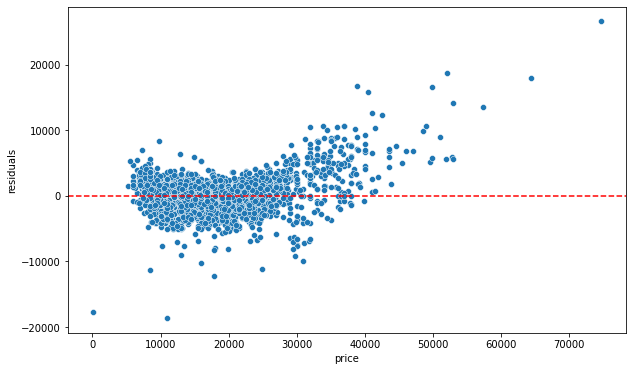

In [27]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = y_test, y = residuals) #-residuals
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("residuals")
plt.show()

<AxesSubplot:xlabel='price', ylabel='Density'>

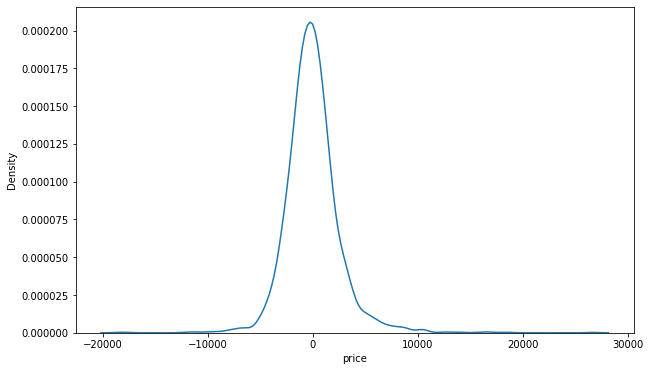

In [28]:
sns.kdeplot(residuals)

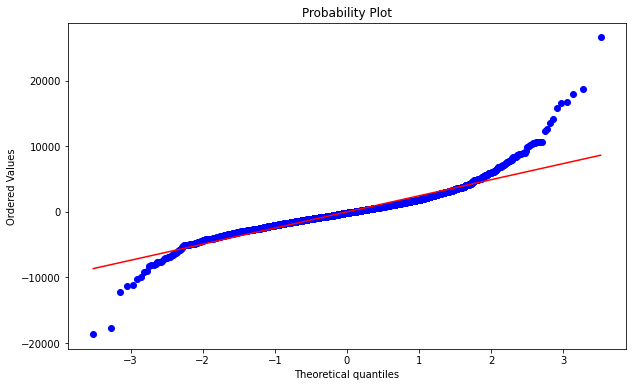

In [29]:
stats.probplot(residuals, dist ="norm", plot =plt);

In [24]:
from scipy.stats import skew
skew(residuals)

1.046839070148528

## 4. Implement Ridge Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True 
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hiperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value. 

In [25]:
from sklearn.linear_model import Ridge

In [26]:
ridge_model = Ridge(alpha=1)

In [27]:
ridge_model.fit(X_train_scaled, y_train)

Ridge(alpha=1)

In [28]:
y_pred = ridge_model.predict(X_test_scaled)
y_train_pred = ridge_model.predict(X_train_scaled)

In [29]:
rs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge")
rs

,ridge_train,ridge_test
R2,0.891,0.886
mae,1700.139,1728.201
mse,5917663.815,6259828.410
rmse,2432.625,2501.965


In [30]:
rm_df = pd.DataFrame(ridge_model.coef_, columns = ["ridge_coef_1"])
rm_df

,ridge_coef_1
0,-1352.240
1,464.611
2,-1809.982
3,44.206
4,2408.998
5,-93.438
6,-193.272
7,-253.852
8,421.381
9,-384.673


In [31]:
pd.concat([ls, rs], axis=1)

,linear_train,linear_test,ridge_train,ridge_test
R2,0.891,0.886,0.891,0.886
mae,1700.169,1728.235,1700.139,1728.201
mse,5917663.025,6259778.441,5917663.815,6259828.410
rmse,2432.625,2501.955,2432.625,2501.965


In [32]:
pd.concat([lm_df,rm_df], axis = 1)

,lm_coef,ridge_coef_1
0,-1352.300,-1352.240
1,464.368,464.611
2,-1810.097,-1809.982
3,44.293,44.206
4,2410.073,2408.998
5,-93.388,-93.438
6,-193.943,-193.272
7,-254.125,-253.852
8,421.830,421.381
9,-384.900,-384.673


__Cross validation__

In [33]:
from sklearn.model_selection import cross_validate, cross_val_score

In [34]:
model = Ridge(alpha=1)
scores = cross_validate(model, X_train_scaled, y_train,
                    scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=10)

In [35]:
pd.DataFrame(scores, index = range(1, 11))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.064,0.004,0.869,-1795.661,-7374776.241,-2715.654
2,0.049,0.002,0.903,-1694.396,-5424972.477,-2329.157
3,0.046,0.003,0.882,-1771.849,-6747071.721,-2597.513
4,0.072,0.002,0.899,-1651.385,-5192520.716,-2278.710
5,0.063,0.003,0.871,-1771.263,-6569289.601,-2563.063
6,0.045,0.002,0.886,-1678.420,-5552674.539,-2356.411
7,0.052,0.003,0.896,-1672.698,-4945019.223,-2223.740
8,0.056,0.003,0.891,-1761.789,-7065166.796,-2658.038
9,0.052,0.003,0.892,-1752.389,-6523150.622,-2554.046
10,0.055,0.002,0.887,-1681.173,-5701633.148,-2387.809


In [36]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                   0.888
test_neg_mean_absolute_error          -1723.102
test_neg_mean_squared_error        -6109627.508
test_neg_root_mean_squared_error      -2466.414
dtype: float64

Linear model and ridge regression have different scores. Moreover, ridge regression should be tuned by finding optimal value of alpha.

#### Choosing best alpha value with GridSearchCV for Ridge

In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
#create serach space starting from 0.01 to 1 with spacing of 0.01
alpha_space = np.linspace(0.1, 1, 10)
alpha_space 

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [39]:
#create new ridge model
ridge_model = Ridge()

In [40]:
#define parameters
param_grid = {"alpha":alpha_space}

In [41]:
grid_ridge = GridSearchCV(estimator = ridge_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =10, verbose =2)

In [42]:
grid_ridge.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.2; total time=   0.0s
[CV] END .....................................

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
             scoring='neg_root_mean_squared_error', verbose=2)

In [43]:
grid_ridge.best_params_

{'alpha': 1.0}

In [44]:
#create serach space starting from 0.01 to 1 with spacing of 0.01
alpha_space = np.linspace(1, 50, 50)
alpha_space 

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50.])

In [45]:
#create new ridge model
ridge_model = Ridge()

In [46]:
#define parameters
param_grid = {"alpha":alpha_space}

In [47]:
grid_ridge = GridSearchCV(estimator = ridge_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =10, verbose =2)

In [48]:
grid_ridge.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END ..........................................alpha=2.0; total time=   0.0s
[CV] END .....................................

[CV] END .........................................alpha=11.0; total time=   0.0s
[CV] END .........................................alpha=11.0; total time=   0.0s
[CV] END .........................................alpha=11.0; total time=   0.0s
[CV] END .........................................alpha=11.0; total time=   0.0s
[CV] END .........................................alpha=11.0; total time=   0.0s
[CV] END .........................................alpha=11.0; total time=   0.0s
[CV] END .........................................alpha=11.0; total time=   0.0s
[CV] END .........................................alpha=12.0; total time=   0.0s
[CV] END .........................................alpha=12.0; total time=   0.0s
[CV] END .........................................alpha=12.0; total time=   0.0s
[CV] END .........................................alpha=12.0; total time=   0.0s
[CV] END .........................................alpha=12.0; total time=   0.0s
[CV] END ...................

[CV] END .........................................alpha=21.0; total time=   0.0s
[CV] END .........................................alpha=21.0; total time=   0.0s
[CV] END .........................................alpha=21.0; total time=   0.0s
[CV] END .........................................alpha=21.0; total time=   0.0s
[CV] END .........................................alpha=22.0; total time=   0.0s
[CV] END .........................................alpha=22.0; total time=   0.0s
[CV] END .........................................alpha=22.0; total time=   0.0s
[CV] END .........................................alpha=22.0; total time=   0.0s
[CV] END .........................................alpha=22.0; total time=   0.0s
[CV] END .........................................alpha=22.0; total time=   0.0s
[CV] END .........................................alpha=22.0; total time=   0.0s
[CV] END .........................................alpha=22.0; total time=   0.0s
[CV] END ...................

[CV] END .........................................alpha=32.0; total time=   0.0s
[CV] END .........................................alpha=32.0; total time=   0.0s
[CV] END .........................................alpha=32.0; total time=   0.0s
[CV] END .........................................alpha=32.0; total time=   0.0s
[CV] END .........................................alpha=32.0; total time=   0.0s
[CV] END .........................................alpha=32.0; total time=   0.0s
[CV] END .........................................alpha=32.0; total time=   0.0s
[CV] END .........................................alpha=32.0; total time=   0.0s
[CV] END .........................................alpha=32.0; total time=   0.0s
[CV] END .........................................alpha=32.0; total time=   0.0s
[CV] END .........................................alpha=33.0; total time=   0.0s
[CV] END .........................................alpha=33.0; total time=   0.0s
[CV] END ...................

[CV] END .........................................alpha=42.0; total time=   0.0s
[CV] END .........................................alpha=42.0; total time=   0.0s
[CV] END .........................................alpha=42.0; total time=   0.0s
[CV] END .........................................alpha=42.0; total time=   0.0s
[CV] END .........................................alpha=42.0; total time=   0.0s
[CV] END .........................................alpha=42.0; total time=   0.0s
[CV] END .........................................alpha=42.0; total time=   0.0s
[CV] END .........................................alpha=42.0; total time=   0.0s
[CV] END .........................................alpha=43.0; total time=   0.0s
[CV] END .........................................alpha=43.0; total time=   0.0s
[CV] END .........................................alpha=43.0; total time=   0.0s
[CV] END .........................................alpha=43.0; total time=   0.0s
[CV] END ...................

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50.])},
             scoring='neg_root_mean_squared_error', verbose=2)

In [49]:
grid_ridge.best_params_

{'alpha': 15.0}

In [50]:
grid_ridge.best_score_

-2466.37636541343

In [51]:
#create serach space starting from 0.01 to 1 with spacing of 0.01
alpha_space = np.linspace(14.9, 15.9, 21)
alpha_space 

array([14.9 , 14.95, 15.  , 15.05, 15.1 , 15.15, 15.2 , 15.25, 15.3 ,
       15.35, 15.4 , 15.45, 15.5 , 15.55, 15.6 , 15.65, 15.7 , 15.75,
       15.8 , 15.85, 15.9 ])

In [52]:
#create new ridge model
ridge_model = Ridge()

In [53]:
#define parameters
param_grid = {"alpha":alpha_space}

In [54]:
grid_ridge = GridSearchCV(estimator = ridge_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =10, verbose =2)

In [55]:
grid_ridge.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 21 candidates, totalling 210 fits
[CV] END .........................................alpha=14.9; total time=   0.0s
[CV] END .........................................alpha=14.9; total time=   0.0s
[CV] END .........................................alpha=14.9; total time=   0.0s
[CV] END .........................................alpha=14.9; total time=   0.0s
[CV] END .........................................alpha=14.9; total time=   0.0s
[CV] END .........................................alpha=14.9; total time=   0.0s
[CV] END .........................................alpha=14.9; total time=   0.0s
[CV] END .........................................alpha=14.9; total time=   0.0s
[CV] END .........................................alpha=14.9; total time=   0.0s
[CV] END .........................................alpha=14.9; total time=   0.0s
[CV] END ...........................alpha=14.950000000000001; total time=   0.0s
[CV] END ...........................alpha=14.9

[CV] END .........................................alpha=15.4; total time=   0.0s
[CV] END .........................................alpha=15.4; total time=   0.0s
[CV] END .........................................alpha=15.4; total time=   0.0s
[CV] END .........................................alpha=15.4; total time=   0.0s
[CV] END .........................................alpha=15.4; total time=   0.0s
[CV] END .........................................alpha=15.4; total time=   0.0s
[CV] END .........................................alpha=15.4; total time=   0.0s
[CV] END .........................................alpha=15.4; total time=   0.0s
[CV] END ...........................alpha=15.450000000000001; total time=   0.0s
[CV] END ...........................alpha=15.450000000000001; total time=   0.0s
[CV] END ...........................alpha=15.450000000000001; total time=   0.0s
[CV] END ...........................alpha=15.450000000000001; total time=   0.0s
[CV] END ...................

[CV] END .........................................alpha=15.9; total time=   0.0s
[CV] END .........................................alpha=15.9; total time=   0.0s
[CV] END .........................................alpha=15.9; total time=   0.0s


GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([14.9 , 14.95, 15.  , 15.05, 15.1 , 15.15, 15.2 , 15.25, 15.3 ,
       15.35, 15.4 , 15.45, 15.5 , 15.55, 15.6 , 15.65, 15.7 , 15.75,
       15.8 , 15.85, 15.9 ])},
             scoring='neg_root_mean_squared_error', verbose=2)

In [56]:
grid_ridge.best_params_

{'alpha': 15.0}

In [57]:
y_pred = grid_ridge.predict(X_test_scaled)
y_train_pred = grid_ridge.predict(X_train_scaled)

In [58]:
rgs = train_val(y_train, y_train_pred, y_test, y_pred, "grid_ridge")
rgs

,grid_ridge_train,grid_ridge_test
R2,0.891,0.886
mae,1699.742,1727.750
mse,5917836.599,6260672.947
rmse,2432.660,2502.134


In [59]:
pd.concat([ls, rs, rgs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,grid_ridge_train,grid_ridge_test
R2,0.891,0.886,0.891,0.886,0.891,0.886
mae,1700.169,1728.235,1700.139,1728.201,1699.742,1727.750
mse,5917663.025,6259778.441,5917663.815,6259828.410,5917836.599,6260672.947
rmse,2432.625,2501.955,2432.625,2501.965,2432.660,2502.134


In [60]:
rm = Ridge(alpha=15).fit(X_train_scaled, y_train) 
rm.coef_

array([-1.35140628e+03,  4.67979972e+02, -1.80833171e+03,  4.29906888e+01,
        2.39418198e+03, -9.41389616e+01, -1.84083389e+02, -2.49990016e+02,
        4.15234345e+02, -3.81533004e+02,  6.84289513e+01, -3.92308975e+01,
        1.82052692e+01,  1.31596364e+02, -2.75033549e+01,  1.31882634e+02,
       -1.18151667e+01, -1.57092460e+01,  2.39526932e+01,  3.49867927e+01,
        9.74199135e+01,  4.61015013e+02,  1.57839218e+02,  5.47431231e+01,
        4.33524739e+01, -2.83310819e+01,  9.29939046e+01,  2.49515275e+01,
       -1.58110511e+02,  9.29386945e+01,  4.94024658e+01,  1.52180392e+02,
       -2.36150388e+01,  2.69804420e+02,  5.56999307e+00,  1.82627880e+02,
        1.15432506e+02, -2.03810631e+02,  4.68852112e+01, -1.18629185e+02,
        9.28340572e+00,  1.84060375e+02, -8.71699387e+01, -1.88158570e+01,
        1.02752650e+02, -2.95912627e+00, -3.50779720e+01, -1.46092410e+01,
       -2.11142846e+02,  2.37164387e+01,  2.57485665e+02,  8.44633978e+00,
        2.12978739e+01, -

In [61]:
rgm_df = pd.DataFrame(rm.coef_, columns=["ridge_coef_15"])

In [62]:
pd.concat([lm_df,rm_df, rgm_df], axis = 1)

,lm_coef,ridge_coef_1,ridge_coef_15
0,-1352.300,-1352.240,-1351.406
1,464.368,464.611,467.980
2,-1810.097,-1809.982,-1808.332
3,44.293,44.206,42.991
4,2410.073,2408.998,2394.182
5,-93.388,-93.438,-94.139
6,-193.943,-193.272,-184.083
7,-254.125,-253.852,-249.990
8,421.830,421.381,415.234
9,-384.900,-384.673,-381.533


## 5. Implement Lasso Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

*Note: To understand the importance of the alpha hyperparameter, you can observe the effects of different alpha values on feature coefficants.*

In [85]:
from sklearn.linear_model import Lasso

In [86]:
lasso_model = Lasso(alpha=100)
lasso_model.fit(X_train_scaled, y_train)

Lasso(alpha=100)

In [87]:
y_pred = lasso_model.predict(X_test_scaled)
y_train_pred = lasso_model.predict(X_train_scaled)

In [88]:
lss = train_val(y_train, y_train_pred, y_test, y_pred, "lasso")
lss

,lasso_train,lasso_test
R2,0.880,0.880
mae,1762.555,1768.101
mse,6553218.528,6597862.931
rmse,2559.925,2568.631


In [89]:
pd.concat([ls, rs, rgs, lss], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,grid_ridge_train,grid_ridge_test,lasso_train,lasso_test
R2,0.891,0.886,0.891,0.886,0.891,0.886,0.880,0.880
mae,1700.169,1728.235,1700.139,1728.201,1699.742,1727.750,1762.555,1768.101
mse,5917663.025,6259778.441,5917663.815,6259828.410,5917836.599,6260672.947,6553218.528,6597862.931
rmse,2432.625,2501.955,2432.625,2501.965,2432.660,2502.134,2559.925,2568.631


In [90]:
model = Lasso(alpha=1)
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=10)

In [91]:
pd.DataFrame(scores, index = range(1, 11))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.320,0.003,0.870,-1795.016,-7371024.095,-2714.963
2,0.237,0.002,0.903,-1692.765,-5419600.366,-2328.004
3,0.282,0.003,0.882,-1771.042,-6744703.751,-2597.057
4,0.294,0.002,0.899,-1650.624,-5188355.291,-2277.796
5,0.263,0.002,0.871,-1769.940,-6559548.807,-2561.162
6,0.255,0.003,0.886,-1677.874,-5552962.635,-2356.472
7,0.246,0.002,0.896,-1671.742,-4941512.051,-2222.951
8,0.268,0.004,0.891,-1761.712,-7073136.010,-2659.537
9,0.303,0.003,0.892,-1751.456,-6519677.437,-2553.366
10,0.276,0.003,0.887,-1680.008,-5701084.850,-2387.694


In [92]:
train_val(y_train, y_train_pred, y_test, y_pred, "lasso")

,lasso_train,lasso_test
R2,0.880,0.880
mae,1762.555,1768.101
mse,6553218.528,6597862.931
rmse,2559.925,2568.631


In [93]:
lasso_model.coef_

array([-1237.24596466,   574.53094731, -1870.98405998,    -0.        ,
        2207.80846538,    -0.        ,     0.        ,    -0.        ,
          -0.        ,   -42.31569311,     0.        ,    -0.        ,
           0.        ,   172.5828221 ,    -0.        ,     0.        ,
          -0.        ,     0.        ,    -0.        ,     0.        ,
          20.66216581,   457.69629018,     0.        ,    -0.        ,
           0.        ,    -0.        ,     0.        ,     0.        ,
          -0.        ,    55.57352204,     0.        ,    31.28405426,
           0.        ,   171.17032412,     0.        ,   159.93131923,
           0.        ,     0.        ,     0.        ,     0.        ,
          18.65970159,   176.36216406,    -0.        ,     0.        ,
          37.21974498,    -0.        ,    -0.        ,    -0.        ,
        -131.13156305,     0.        ,   188.81434917,    -0.        ,
           0.        ,    -0.        ,     0.        ,    -0.        ,
      

In [72]:
lsm_df = pd.DataFrame(lasso_model.coef_, columns = ["lasso_coef_1"])

In [73]:
pd.concat([lm_df,rm_df, rgm_df, lsm_df], axis = 1)

,lm_coef,ridge_coef_1,ridge_coef_15,lasso_coef_1
0,-1352.300,-1352.240,-1351.406,-1350.184
1,464.368,464.611,467.980,464.424
2,-1810.097,-1809.982,-1808.332,-1811.958
3,44.293,44.206,42.991,42.527
4,2410.073,2408.998,2394.182,2400.698
5,-93.388,-93.438,-94.139,-92.401
6,-193.943,-193.272,-184.083,-180.966
7,-254.125,-253.852,-249.990,-247.986
8,421.830,421.381,415.234,404.915
9,-384.900,-384.673,-381.533,-373.460


In [79]:
lasso_model = Lasso(max_iter=100000)

In [80]:
#create serach space starting from 0.0001 to 0.01 with spacing of 0.0001
alpha_space = np.linspace(0.01, 1, 100)
alpha_space 

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [81]:
param_grid = {"alpha":alpha_space}

In [82]:
grid_lasso = GridSearchCV(estimator = lasso_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =10, verbose =2)

In [83]:
grid_lasso.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV] END .........................................alpha=0.01; total time=   0.4s
[CV] END .........................................alpha=0.01; total time=   0.4s
[CV] END .........................................alpha=0.01; total time=   0.4s
[CV] END .........................................alpha=0.01; total time=   0.3s
[CV] END .........................................alpha=0.01; total time=   0.3s
[CV] END .........................................alpha=0.01; total time=   0.3s
[CV] END .........................................alpha=0.01; total time=   0.3s
[CV] END .........................................alpha=0.01; total time=   0.3s
[CV] END .........................................alpha=0.01; total time=   0.3s
[CV] END .........................................alpha=0.01; total time=   0.3s
[CV] END .........................................alpha=0.02; total time=   0.3s
[CV] END ...................................

[CV] END .........................................alpha=0.11; total time=   0.2s
[CV] END .........................................alpha=0.11; total time=   0.2s
[CV] END .........................................alpha=0.11; total time=   0.2s
[CV] END .........................................alpha=0.11; total time=   0.3s
[CV] END .........................................alpha=0.11; total time=   0.2s
[CV] END .........................................alpha=0.11; total time=   0.2s
[CV] END .........................................alpha=0.11; total time=   0.2s
[CV] END .........................................alpha=0.11; total time=   0.2s
[CV] END .........................................alpha=0.11; total time=   0.2s
[CV] END .........................................alpha=0.12; total time=   0.2s
[CV] END .........................................alpha=0.12; total time=   0.2s
[CV] END .........................................alpha=0.12; total time=   0.2s
[CV] END ...................

[CV] END ..........................alpha=0.21000000000000002; total time=   0.2s
[CV] END ..........................alpha=0.21000000000000002; total time=   0.2s
[CV] END ..........................alpha=0.21000000000000002; total time=   0.2s
[CV] END ..........................alpha=0.21000000000000002; total time=   0.2s
[CV] END ..........................alpha=0.21000000000000002; total time=   0.2s
[CV] END ..........................alpha=0.21000000000000002; total time=   0.3s
[CV] END ..........................alpha=0.21000000000000002; total time=   0.4s
[CV] END .........................................alpha=0.22; total time=   0.2s
[CV] END .........................................alpha=0.22; total time=   0.3s
[CV] END .........................................alpha=0.22; total time=   0.4s
[CV] END .........................................alpha=0.22; total time=   0.3s
[CV] END .........................................alpha=0.22; total time=   0.3s
[CV] END ...................

[CV] END .........................................alpha=0.31; total time=   0.2s
[CV] END .........................................alpha=0.31; total time=   0.3s
[CV] END .........................................alpha=0.31; total time=   0.3s
[CV] END .........................................alpha=0.31; total time=   0.4s
[CV] END .........................................alpha=0.31; total time=   0.4s
[CV] END .........................................alpha=0.32; total time=   0.4s
[CV] END .........................................alpha=0.32; total time=   0.2s
[CV] END .........................................alpha=0.32; total time=   0.4s
[CV] END .........................................alpha=0.32; total time=   0.3s
[CV] END .........................................alpha=0.32; total time=   0.3s
[CV] END .........................................alpha=0.32; total time=   0.2s
[CV] END .........................................alpha=0.32; total time=   0.2s
[CV] END ...................

[CV] END ..........................alpha=0.41000000000000003; total time=   0.2s
[CV] END ..........................alpha=0.41000000000000003; total time=   0.2s
[CV] END ..........................alpha=0.41000000000000003; total time=   0.2s
[CV] END ..........................alpha=0.42000000000000004; total time=   0.2s
[CV] END ..........................alpha=0.42000000000000004; total time=   0.2s
[CV] END ..........................alpha=0.42000000000000004; total time=   0.2s
[CV] END ..........................alpha=0.42000000000000004; total time=   0.2s
[CV] END ..........................alpha=0.42000000000000004; total time=   0.2s
[CV] END ..........................alpha=0.42000000000000004; total time=   0.2s
[CV] END ..........................alpha=0.42000000000000004; total time=   0.2s
[CV] END ..........................alpha=0.42000000000000004; total time=   0.2s
[CV] END ..........................alpha=0.42000000000000004; total time=   0.2s
[CV] END ...................

[CV] END .........................................alpha=0.51; total time=   0.4s
[CV] END .........................................alpha=0.52; total time=   0.4s
[CV] END .........................................alpha=0.52; total time=   0.3s
[CV] END .........................................alpha=0.52; total time=   0.3s
[CV] END .........................................alpha=0.52; total time=   0.3s
[CV] END .........................................alpha=0.52; total time=   0.2s
[CV] END .........................................alpha=0.52; total time=   0.2s
[CV] END .........................................alpha=0.52; total time=   0.2s
[CV] END .........................................alpha=0.52; total time=   0.2s
[CV] END .........................................alpha=0.52; total time=   0.2s
[CV] END .........................................alpha=0.52; total time=   0.2s
[CV] END .........................................alpha=0.53; total time=   0.2s
[CV] END ...................

[CV] END .........................................alpha=0.62; total time=   0.1s
[CV] END .........................................alpha=0.62; total time=   0.2s
[CV] END .........................................alpha=0.62; total time=   0.2s
[CV] END .........................................alpha=0.62; total time=   0.2s
[CV] END .........................................alpha=0.62; total time=   0.2s
[CV] END .........................................alpha=0.62; total time=   0.2s
[CV] END .........................................alpha=0.62; total time=   0.2s
[CV] END .........................................alpha=0.62; total time=   0.2s
[CV] END .........................................alpha=0.62; total time=   0.2s
[CV] END .........................................alpha=0.63; total time=   0.2s
[CV] END .........................................alpha=0.63; total time=   0.2s
[CV] END .........................................alpha=0.63; total time=   0.2s
[CV] END ...................

[CV] END .........................................alpha=0.72; total time=   0.2s
[CV] END .........................................alpha=0.72; total time=   0.2s
[CV] END .........................................alpha=0.72; total time=   0.2s
[CV] END .........................................alpha=0.72; total time=   0.2s
[CV] END .........................................alpha=0.72; total time=   0.2s
[CV] END .........................................alpha=0.72; total time=   0.2s
[CV] END .........................................alpha=0.72; total time=   0.2s
[CV] END .........................................alpha=0.73; total time=   0.2s
[CV] END .........................................alpha=0.73; total time=   0.2s
[CV] END .........................................alpha=0.73; total time=   0.2s
[CV] END .........................................alpha=0.73; total time=   0.2s
[CV] END .........................................alpha=0.73; total time=   0.2s
[CV] END ...................

[CV] END ...........................alpha=0.8200000000000001; total time=   0.3s
[CV] END ...........................alpha=0.8200000000000001; total time=   0.3s
[CV] END ...........................alpha=0.8200000000000001; total time=   0.3s
[CV] END ...........................alpha=0.8200000000000001; total time=   0.2s
[CV] END ...........................alpha=0.8200000000000001; total time=   0.2s
[CV] END ...........................alpha=0.8300000000000001; total time=   0.2s
[CV] END ...........................alpha=0.8300000000000001; total time=   0.2s
[CV] END ...........................alpha=0.8300000000000001; total time=   0.2s
[CV] END ...........................alpha=0.8300000000000001; total time=   0.2s
[CV] END ...........................alpha=0.8300000000000001; total time=   0.2s
[CV] END ...........................alpha=0.8300000000000001; total time=   0.2s
[CV] END ...........................alpha=0.8300000000000001; total time=   0.2s
[CV] END ...................

[CV] END .........................................alpha=0.92; total time=   0.1s
[CV] END .........................................alpha=0.92; total time=   0.1s
[CV] END .........................................alpha=0.92; total time=   0.2s
[CV] END .........................................alpha=0.93; total time=   0.1s
[CV] END .........................................alpha=0.93; total time=   0.2s
[CV] END .........................................alpha=0.93; total time=   0.2s
[CV] END .........................................alpha=0.93; total time=   0.2s
[CV] END .........................................alpha=0.93; total time=   0.2s
[CV] END .........................................alpha=0.93; total time=   0.2s
[CV] END .........................................alpha=0.93; total time=   0.2s
[CV] END .........................................alpha=0.93; total time=   0.2s
[CV] END .........................................alpha=0.93; total time=   0.2s
[CV] END ...................

GridSearchCV(cv=10, estimator=Lasso(max_iter=100000),
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])},
             scoring='neg_root_mean_squared_error', verbose=2)

In [84]:
grid_lasso.best_params_

{'alpha': 1.0}

In [ ]:
lasso_model = Lasso(max_iter=100000)

In [ ]:
#create serach space starting from 0.0001 to 0.01 with spacing of 0.0001
alpha_space = np.linspace(1, 20, 20)
alpha_space 

In [ ]:
param_grid = {"alpha":alpha_space}

In [ ]:
grid_lasso = GridSearchCV(estimator = lasso_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =10, verbose =2)

In [ ]:
grid_lasso.fit(X_train_scaled, y_train)

In [ ]:
grid_lasso.best_params_

In [ ]:
grid_lasso.best_score_

In [ ]:
lasso_model = Lasso(max_iter=100000)

In [ ]:
#create serach space starting from 0.0001 to 0.01 with spacing of 0.0001
alpha_space = np.linspace(3.5, 4.5, 11)
alpha_space 

In [ ]:
param_grid = {"alpha":alpha_space}

In [ ]:
grid_lasso = GridSearchCV(estimator = lasso_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =10, verbose =2)

In [ ]:
grid_lasso.fit(X_train_scaled, y_train)

In [ ]:
grid_lasso.best_params_

In [ ]:
y_pred = grid_lasso.predict(X_test_scaled)
y_train_pred = grid_lasso.predict(X_train_scaled)

In [ ]:
lgs = train_val(y_train, y_train_pred, y_test, y_pred, "grid_lasso")
lgs

In [ ]:
pd.concat([ls, rs, rgs, lss, lgs], axis = 1)

In [ ]:
lsm = Lasso(alpha=4).fit(X_train_scaled, y_train) # 'GridSearchCV' object has no attribute 'coef_'
lsm.coef_

In [ ]:
lgm_df = pd.DataFrame(lsm.coef_, columns=["lasso_coef_4"])

In [ ]:
pd.concat([lm_df, rm_df, rgm_df, lsm_df, lgm_df], axis = 1)

## 6. Implement Elastic-Net

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
elastic_model = ElasticNet(alpha=1, l1_ratio=0.5)
elastic_model.fit(X_train_scaled, y_train)

In [ ]:
y_pred = elastic_model.predict(X_test_scaled)
y_train_pred = elastic_model.predict(X_train_scaled)

In [ ]:
es = train_val(y_train, y_train_pred, y_test, y_pred, "elastic")
es

In [ ]:
pd.concat([ls,rs, rgs, lss, lgs, es], axis = 1)

In [ ]:
model = ElasticNet(alpha=1, l1_ratio=0.5)
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=10)

In [ ]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:]

In [ ]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

In [ ]:
train_val(y_train, y_train_pred, y_test, y_pred, "elastic")

In [ ]:
elastic_model.coef_

In [ ]:
em_df = pd.DataFrame(elastic_model.coef_, columns=["elastic_coef_(alp:1, l1:0.5)"])

In [ ]:
pd.concat([lm_df, rm_df, rgm_df, lsm_df, lgm_df, em_df], axis = 1)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
elastic_model = ElasticNet(max_iter=10000)

In [ ]:
param_grid = {"alpha":[10, 12, 13, 14, 15, 16, 17],
            "l1_ratio":[2, 3, 4, 5, 6]}

In [ ]:
grid_model = GridSearchCV(estimator = elastic_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =10, verbose =2)

In [ ]:
grid_model.fit(X_train_scaled, y_train)

In [ ]:
grid_model.best_params_

In [ ]:
elastic_model = ElasticNet(max_iter=10000)

In [ ]:
param_grid = {"alpha":[9.8, 9.9, 10, 10.1, 10.2],
            "l1_ratio":[1.8, 1.9, 2, 2.1, 2.2]}

In [ ]:
grid_model = GridSearchCV(estimator = elastic_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =10, verbose =2)

In [ ]:
grid_model.fit(X_train_scaled, y_train)

In [ ]:
grid_model.best_params_

In [ ]:
param_grid = {"alpha":[5, 6, 7, 8, 9.8],
            "l1_ratio":[1, 1.3, 1.5, 1.7, 1.8]}

In [ ]:
elastic_model = ElasticNet(max_iter=10000)

In [ ]:
grid_model = GridSearchCV(estimator = elastic_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =10, verbose =2)

In [ ]:
grid_model.fit(X_train_scaled, y_train)

In [ ]:
grid_model.best_params_

In [ ]:
elastic_model = ElasticNet(max_iter=10000)

In [ ]:
param_grid = {"alpha":[0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
            "l1_ratio":[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]}

In [ ]:
grid_model = GridSearchCV(estimator = elastic_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =10, verbose =2)

In [ ]:
grid_model.fit(X_train_scaled, y_train)

In [ ]:
grid_model.best_params_

In [ ]:
y_pred = grid_model.predict(X_test_scaled) # ElasticNet(alpha=91, l1_ratio=1)
y_train_pred = grid_model.predict(X_train_scaled)

In [ ]:
egs=train_val(y_train, y_train_pred, y_test, y_pred, "GridSearch")
egs

In [ ]:
pd.concat([ls,rs, rgs, lss, lgs, es,egs], axis = 1)

In [ ]:
esm = ElasticNet(alpha=1, l1_ratio=1).fit(X_train_scaled, y_train) # 'GridSearchCV' object has no attribute 'coef_'
esm.coef_

In [ ]:
esm_df = pd.DataFrame(esm.coef_, columns=["elastic_coef_(alp:1, l1:1)"])

In [ ]:
pd.concat([lm_df, rm_df, rgm_df, lsm_df, lgm_df, em_df, esm_df], axis = 1)

## 7. Visually Compare Models Performance In a Graph

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___